# All About Logistic Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
data = load_iris()
full_data = np.concatenate((data.data,data.target.reshape(-1,1)),axis=1)
df = pd.DataFrame(full_data, columns=data.feature_names+["Species"])
df.drop(df[df['Species'] == 2].index,inplace=True)
df.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], axis=1, inplace=True)
df

,petal width (cm),Species
0,0.2,0.0
1,0.2,0.0
2,0.2,0.0
3,0.2,0.0
4,0.2,0.0
...,...,...
95,1.2,1.0
96,1.3,1.0
97,1.3,1.0
98,1.1,1.0


### Code from scratch for Logistic Regression 

In [ ]:
def gradient_descent(x,y,ecophs,learning_rate):
    
    m,n = x.shape
    #Random value to weights
    W = np.zeros(n) 
    b=0
    for i in range(ecophs):
        #Sigmoid Function
        H = 1/(1+ np.exp( -(x.dot(W)+b) ))
        #Gradient Calculation
        dic = H - y.T
        dic = np.reshape(dic,m)
        dW = np.dot(x.T, dic)/m
        db = np.sum(dic)/m
        #Updating Weights
        W = W - learning_rate * dW
        b = b - learning_rate * db
    
    return W, b

def predict(x,W,b):
    p = 1/(1+ np.exp( -(x.dot(W)+b) )) #gives probabilistic answer
    y = np.where( p > 0.5, 1, 0 ) # threshold is 0.5 
    return y

W,b = gradient_descent(X,y,1000,0.01)
y_pre_Scratch = predict(X,W,b)

### Logistic Regression using sklearn module

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y.T[0])
y_pre_sk = model.predict(X)



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Confusion matrix Score of our model

confusion_matrix(y, y_pre_sk)

In [ ]:
# Accuracy Score of Sklearn model
accuracy_score(y,y_pre_sk)

In [ ]:
# Accuracy Score of our model
accuracy_score(y,y_pre)

## Graphs used in the Article 

<AxesSubplot:xlabel='petal width (cm)', ylabel='Species'>

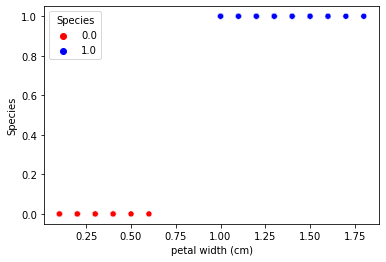

In [7]:
sb.scatterplot(x="petal width (cm)", y="Species",data=df, hue='Species', palette=['red', 'blue'])

In [37]:
X = np.array(df['petal width (cm)']).reshape(-1,1)
y = np.array(df['Species']).reshape(-1,1)

In [38]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [39]:
min_y = model.predict([[min(X)[0]]])
max_y = model.predict([[max(X)[0]]])

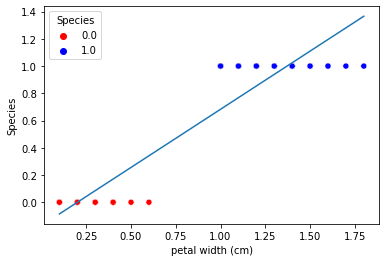

In [42]:
xpoints = [min(X)[0], max(X)[0]]
ypoints = [min_y[0][0], max_y[0][0]]
sb.scatterplot(x="petal width (cm)", y="Species",data=df, hue='Species', palette=['red', 'blue'])
plt.plot(xpoints, ypoints)

In [12]:
dt = {"petal width (cm)":[6.5,6.7], "Species":[1,1]}
df1 = pd.DataFrame(dt)

df1 = pd.concat([df,df1],ignore_index = True)

In [13]:
df1

,petal width (cm),Species
0,0.2,0.0
1,0.2,0.0
2,0.2,0.0
3,0.2,0.0
4,0.2,0.0
...,...,...
97,1.3,1.0
98,1.1,1.0
99,1.3,1.0
100,6.5,1.0


<AxesSubplot:xlabel='petal width (cm)', ylabel='Species'>

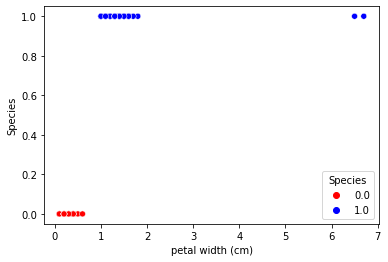

In [44]:
sb.scatterplot(x="petal width (cm)", y="Species",data=df1, hue='Species', palette=['red', 'blue'])


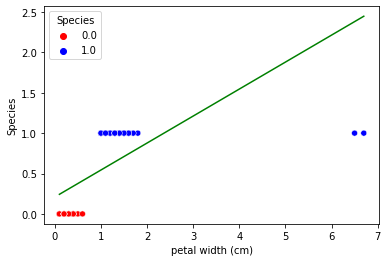

In [88]:
X = np.array(df1['petal width (cm)']).reshape(-1,1)
y = np.array(df1['Species']).reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
min_y = model.predict([[min(X)[0]]])
max_y = model.predict([[max(X)[0]]])
xpoints = [min(X)[0], max(X)[0]]
ypoints = [min_y[0][0], max_y[0][0]]
sb.scatterplot(x="petal width (cm)", y="Species",data=df1, hue='Species', palette=['red', 'blue'])
plt.plot(xpoints, ypoints, "g")

In [18]:
X = np.array(df['petal width (cm)']).reshape(-1,1)
y = np.array(df['Species'])

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [31]:
X_new = np.linspace(0,2,1000).reshape(-1,1)
y_pre = model.predict_proba(X_new)

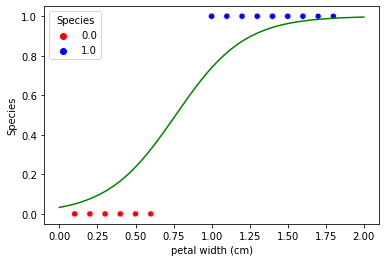

In [46]:
sb.scatterplot(x="petal width (cm)", y="Species",data=df, hue='Species', palette=['red', 'blue'])
plt.plot(X_new,y_pre[:,1],"g")